# Laboratorio: lezione 1 

# Esercizio 3

Collegatevi al sito upload.di.unimi.it, selezionate l’esame di Statistica e analisi dei dati per l’appello odierno e scaricate il file carsharing.csv. Questo file contiene le seguenti informazioni
raccolte da un servizio di car sharing riguardo a singoli utilizzi dei veicoli della propria flotta:

• CarIdentifier : identificatore del veicolo;

• TimeFrame: fascia oraria in cui il veicolo è stato utilizzato;

• RushHour : indica se la fascia oraria corrisponde a un orario di punta, usando un’ovvia codifica binaria;

• PremiumCustomer : indica se l’utente che ha utilizzato il veicolo è iscritto al programma Premium (usando anche in questo caso una semplice codifica binaria);

• Distance: lunghezza del tragitto (espressa in km);

• Time: tempo impiegato a percorrere il tragitto (espresso in minuti).

In questo file il carattere ";" separa le colonne e i numeri reali sono stati registrati usando il carattere "," come separatore dei decimali.

1. Quanti casi contiene il file?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
carsharing =pd.read_csv('carsharing.csv', sep=';', decimal=',')
len(carsharing)

392


2. Analizziamo l’utilizzo del servizio di car sharing nelle diverse fasce orarie (carattere TimeFrame) e negli orari di maggior o minor traffico (carattere RushHour ).

In [31]:
time_frame= carsharing['TimeFrame'].value_counts().sort_index()
rush_hour= carsharing['RushHour'].value_counts().sort_index()

time_frame

FRAME A     47
FRAME B    123
FRAME C    107
FRAME D     94
FRAME E     21
Name: TimeFrame, dtype: int64

In [32]:
rush_hour

0    175
1    217
Name: RushHour, dtype: int64

2.1. Il carattere TimeFrame è nominale, ordinale o scalare? Giustificate la risposta.

variabile numerica discreta rappresenta il numero di volte in cui si verifica l'evento

2.2. In quante fasce orarie è stata suddivisa una giornata?


Cinque fasce A,B,C,D,E

2.3. In quali fasce orarie il servizio di car sharing è stato maggiormente utilizzato?

Nella fascia B

2.4. Calcolate la tabella delle frequenze congiunte di TimeFrame e RushHour.

In [58]:
time_frame_freq= pd.crosstab(index= carsharing['TimeFrame'], 
                            columns=['Abs. freq'])
rush_hour_freq= pd.crosstab(index= carsharing['RushHour'], 
                            columns=['Abs. freq'])
                                                      
freq_cong= pd.crosstab(index=carsharing['TimeFrame'], 
                              columns=carsharing['RushHour'])
freq_cong

RushHour,0,1
TimeFrame,,
FRAME A,47,0
FRAME B,0,123
FRAME C,107,0
FRAME D,0,94
FRAME E,21,0


2.5. Leggendo la tabella calcolata al punto precedente determinate quali sono le fasce orarie che corrispondono all’ora di punta.

FRAME B e FRAME D

3. Consideriamo, solo in questo punto dell’esercizio, i clienti che hanno aderito al programma Premium (Premium=1).
3.1. Quanti sono?

In [27]:
carsharing['PremiumCustomer'].value_counts()

 1    227
-1    165
Name: PremiumCustomer, dtype: int64

3.2. Calcolate la distanza media percorsa in un tragitto da un cliente che ha aderito al programma Premium.

In [22]:
premium= carsharing[carsharing['PremiumCustomer']==1]
distance_premium= premium['Distance']

distance_premium.sum()/len(distance_premium)

8.437444933920705

4. Ritorniamo a considerare il dataset completo e studiamo la distanza percorsa in ciascun utilizzo del servizio (carattere Distance).
4.1. Il carattere Distance è nominale, ordinale o scalare? Giustificate la risposta.

scalare, la  variabile  viene  misurata  sulla base  di  una  unità  di  misura.  I  numeri  assegnati  allemodalità  hanno  un  vero  e  proprio  significato  numerico. 

4.2. Tracciate il boxplot di tale carattere.

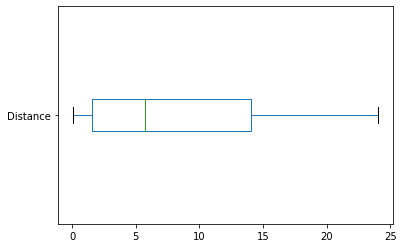

In [23]:
distance= carsharing['Distance']
distance.plot.box(vert=False, whis='range')
plt.show()

4.3. In base all’aspetto del grafico ottenuto al punto precedente, determinate quali sono gli indici di centralità e di dispersione che meglio caratterizzano la distanza percorsa, calcolandone il valore.

In [24]:
distance.describe()

count    392.000000
mean       7.858673
std        6.805123
min        0.100000
25%        1.575000
50%        5.750000
75%       14.025000
max       24.000000
Name: Distance, dtype: float64

4.4. Riscontrate una relazione tra la distanza percorsa e il tempo impiegato? In caso affermativo, caratterizzate tale relazione. In ogni caso giustificate la vostra risposta mostrando un grafico

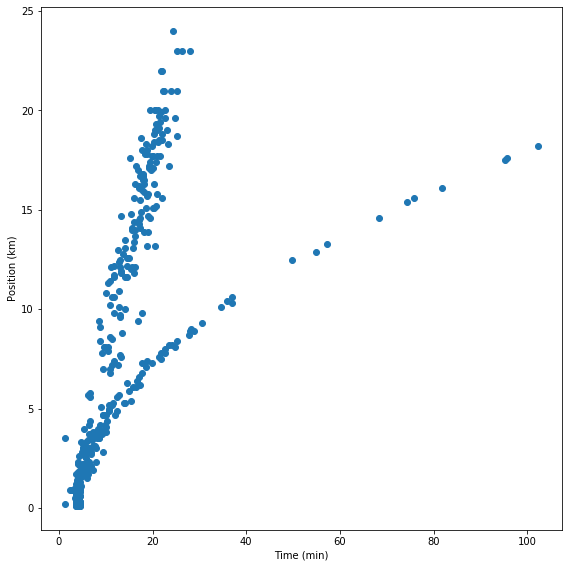

In [51]:
spazio_tempo= carsharing[['Distance', 'Time']]

time=carsharing['Time']
position=carsharing['Distance']

fig = plt.figure(figsize=(8,8))  # larghezza , altezza in pollici
ax = fig.add_subplot(111)
ax.plot(time, position, 'o')
ax.set_xlabel('Time (min)')
ax.set_ylabel('Position (km)')
plt.tight_layout()
plt.show()

#plt.scatter(time, position, )
#plt.xlabel('Time (min)')
#plt.ylabel('Position (km)')

Allora spazio e tempo sono direttamente proporzioni all'aumentare dello spazio percorso aumenta anche il tempo impiegato,.....
Considerando l'indice di correlazione che varia tra -1 e 1 direi che c'è correlazione essendo 0,6 

4.5. Calcolate l’indice di correlazione tra la distanza e il tempo. Il valore ottenuto supporta la risposta che avete dato al punto precedente?

In [66]:
spazio_tempo.corr()

,Distance,Time
Distance,1.000000,0.627399
Time,0.627399,1.000000


4.6. Tracciate, possibilmente nella stessa figura, il box plot della distanza nel caso di utilizzo dell’auto in orario di punta (RushHour =1) e in orario non di punta (Rush-Hour =0).

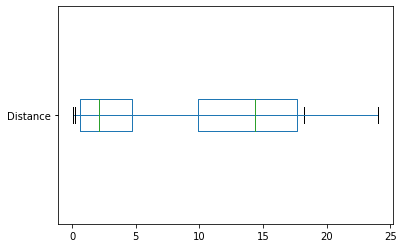

In [75]:
dataset_rushhour_1= carsharing[carsharing['RushHour']==1]
dataset_rushhour_0= carsharing[carsharing['RushHour']==0]

distance_1= dataset_rushhour_1['Distance']
distance_0= dataset_rushhour_0['Distance']
distance_1.plot.box(vert=False, whis='range')
distance_0.plot.box(vert=False, whis='range')
plt.show()

4.7. Ispezionando i due grafici ottenuti al punto precedente, dite se negli orari di punta sono privilegiati spostamenti "più brevi" oppure "più lunghi" rispetto agli orari non di punta, giustificando la risposta.

In [ ]:
gli orari di punta  privelegiano gli spostamenti brevi, quelli non di punta gli spostamenti più lunghi

4.8. Tracciate, possibilmente nella stessa figura, il box plot della distanza nel caso di utilizzo dell’auto da parte dei clienti che hanno aderito al programma Premium (Premium=1) e di quelli che non vi hanno aderito (Premium=-1).

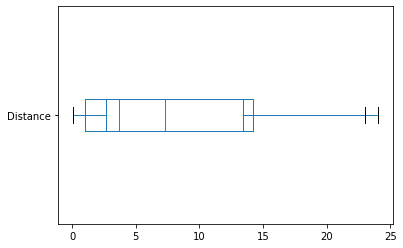

In [4]:
dataset_premium_1= carsharing[carsharing['PremiumCustomer']==1]
dataset_non_premium= carsharing[carsharing['PremiumCustomer']==-1]

distance_premium= dataset_premium_1['Distance']
distance_non_premium= dataset_non_premium['Distance']
distance_premium.plot.box(vert=False, whis='range')
distance_non_premium.plot.box(vert=False, whis='range')
plt.show()

4.9. Ispezionando i due grafici ottenuti al punto precedente, notate una grossa differenza nelle distanze percorse dai clienti dei due gruppi?

non molta i clienti non premium siamo sui 4 km mentre gli altri sui 7 

4.10. In Figura 1 è mostrato l’istogramma della distanza percorsa. In tale grafico si può individuare la presenza di due gruppi abbastanza distinti. I due gruppi sono relativi al tipo di cliente (PremiumCustomer =1 oppure Premium-Customer =-1) oppure all’orario di utilizzo del veicolo (RushHour =1 oppure Rush- Hour =0)? In altri termini, la distanza percorsa dipende dal fatto che l’utente sia un
cliente Premium/non-Premium oppure dal fatto che l’utilizzo è avvenuto in orario Rush/non-Rush? Suggerimento: per rispondere a questa domanda basta ispezionare i boxplot prodotti nei punti precedenti di questo esercizio.

guardando i box plot la distanza è influenzata dall'orario di punta e dai clienti non premium 

4.11. Calcolate la distanza media nei due gruppi di orario (di punta/non di punta) e commentate l’istogramma di Figura 1 utilizzando queste due informazioni.

In [5]:
dataset_rushhour_1= carsharing[carsharing['RushHour']==1]
dataset_rushhour_0= carsharing[carsharing['RushHour']==0]

distanza1= dataset_rushhour_1['Distance']
distanza0= dataset_rushhour_0['Distance']

distanza1.sum()/len(distanza1) , distanza0.sum()/len(distanza0)

(3.319354838709678, 13.487428571428573)

4.12. Sempre in riferimento ai due gruppi di orario (di punta/non di punta), calcolate la
varianza within groups e la varianza between groups.

In [7]:
sum_within = sum((distanza1 - distanza1.mean())**2) + \
                    sum((distanza0 - distanza0.mean())**2)

all_distance = pd.concat([distanza1, distanza0])

sum_between = len(distanza1) * (distanza1.mean() - all_distance.mean())**2 + \
                    len(distanza0) * (distanza0.mean() - all_distance.mean())**2

sum_within, sum_between




(8091.211052534557, 10015.8794576695)

# Esercizio 4

Analizziamo ora la distanza percorsa in ciascun utilizzo del servizio negli orari di punta (Rush-Hour =1)
1. Tracciate un grafico rappresentativo della distribuzione della distanza percorsa negli orari di punta.

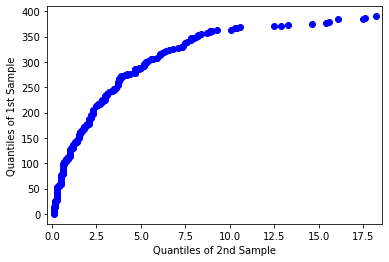

In [11]:
#dataset_rushhour_1= carsharing[carsharing['RushHour']==1]
#plt.bar(dataset_rushhour_1['Distance'].index, dataset_rushhour_1['Distance'].get_values())
#plt.show()

import statsmodels.api as sm
sm.qqplot_2samples(dataset_rushhour_1['Distance'].index, dataset_rushhour_1['Distance'].get_values()) 
plt.show()

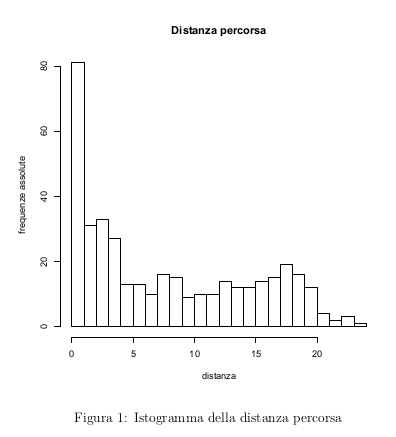

In [7]:
from IPython.display import Image
Image(filename='stat_lab1.png')

2. È plausibile affermare che negli orari di punta la distanza segue una legge normale? Giustificate la risposta.

In [12]:
dataset_rushhour_1['Distance'].std() 

3.711106147915895

La distribuzione normale standardizzata è un caso specifico che si ottiene quando la media è uguale a zero (μ=0) e la deviazione standard è uguale a uno (σ=1). 

3. Calcolate la media e la deviazione standard della distanza negli orari di punta.

In [14]:
dataset_rushhour_1['Distance'].sum()/len(dataset_rushhour_1['Distance']), dataset_rushhour_1['Distance'].std() 

(3.319354838709678, 3.711106147915895)

# Esercizio 5

Concentriamoci ora sulla distanza percorsa dai veicoli negli orari non di punta.
1. Tracciate un grafico opportuno che descriva la distanza percorsa negli orari non di punta.

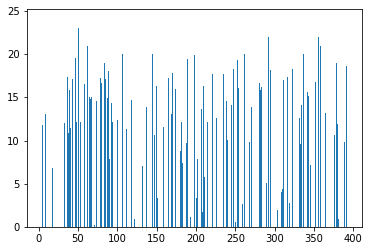

In [15]:
dataset_rushhour_o= carsharing[carsharing['RushHour']==0]
plt.bar(dataset_rushhour_0['Distance'].index, dataset_rushhour_0['Distance'].get_values())
plt.show()


2. È plausibile affermare che negli orari non di punta la distanza segue una legge normale? Giustificate la risposta.

no per la ragione dell'es 4

3. Calcolate la media e la mediana della distanza negli orari non di punta e, alla luce di tali valori, commentate ulteriormente la risposta che avete dato al punto precedente

In [17]:
dataset_rushhour_0['Distance'].sum()/len(dataset_rushhour_0['Distance']), dataset_rushhour_0['Distance'].std() 

(13.487428571428573, 5.422596582319328)

# Esercizio 6

Selezionate in una variabile chiamata tragittibrevi tutti i casi in cui il veicolo è stato
utilizzato per percorrere un tragitto breve, cioè di lunghezza inferiore a 1.5 km.

1. Tracciate il grafico di dispersione della distanza e del tempo per i tragitti brevi.

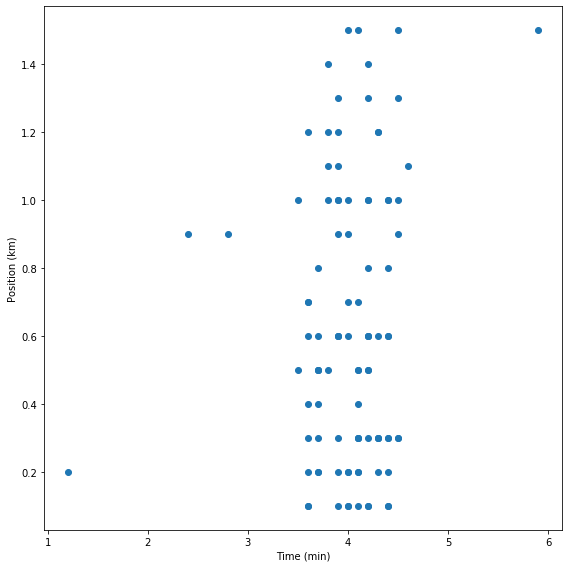

In [7]:
tragittibrevi = carsharing[carsharing['Distance']<=1.5]
spazio_tempo= tragittibrevi[['Distance', 'Time']]

time=tragittibrevi['Time']
position=tragittibrevi['Distance']

fig = plt.figure(figsize=(8,8))  # larghezza , altezza in pollici
ax = fig.add_subplot(111)
ax.plot(time, position, 'o')
ax.set_xlabel('Time (min)')
ax.set_ylabel('Position (km)')
plt.tight_layout()
plt.show()


2. Commentate il grafico che avete tracciato al punto precedente, possibilmente collegandolo
al valore assunto dall’indice di variazione per il carattere Time.

In [22]:
time.var()

0.23958342099726518

In [23]:
time.std()

0.4894725947356656

In [24]:
time.describe()

count    98.000000
mean      4.002041
std       0.489473
min       1.200000
25%       3.800000
50%       4.050000
75%       4.275000
max       5.900000
Name: Time, dtype: float64

In [9]:
spazio_tempo.corr()

,Distance,Time
Distance,1.00000,0.14576
Time,0.14576,1.00000


nelle distanze sotto 1.5 km il tempo è tra 3 e 5